In [106]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
from sklearn import ensemble, cross_validation, learning_curve, metrics, datasets, tree

import numpy as np
import pandas as pd

In [6]:
#Загружаем датасет digits
digits = datasets.load_digits()

## Классификация при помощи дерева

In [49]:
clf_tree = tree.DecisionTreeClassifier(random_state = 1)

In [53]:
scores_tree = cross_validation.cross_val_score(clf_tree, digits.data, digits.target, cv = 10)

In [25]:
def write_answer_1(answer):
    with open("bagging_rf_answer1.txt", "w") as fout:
        fout.write(str(answer))

In [26]:
write_answer_1(scores_tree.mean())

## Бэггинг

In [56]:
clf_bagging = ensemble.BaggingClassifier(n_estimators=100, random_state = 1)

In [57]:
scores_bagging = cross_validation.cross_val_score(clf_bagging, digits.data, digits.target, cv = 10)

In [58]:
def write_answer_2(answer):
    with open("bagging_rf_answer2.txt", "w") as fout:
        fout.write(str(answer))

In [59]:
write_answer_2(scores_bagging.mean())

## Метод случайных подпространств

In [66]:
import math

In [69]:
clf_bagging = ensemble.BaggingClassifier(n_estimators=100, random_state = 1, max_features = int(math.sqrt(digits.data.shape[1])))

In [71]:
scores_bagging = cross_validation.cross_val_score(clf_bagging, digits.data, digits.target, cv = 10)

In [72]:
def write_answer_3(answer):
    with open("bagging_rf_answer3.txt", "w") as fout:
        fout.write(str(answer))

In [73]:
write_answer_3(scores_bagging.mean())

## Бэггинг на рандомизированных деревьях (случайный лес)

In [78]:
clf_tree = tree.DecisionTreeClassifier(random_state = 1, max_features = int(math.sqrt(digits.data.shape[1])))
clf_bagging_rf = ensemble.BaggingClassifier(base_estimator = clf_tree, n_estimators=100, random_state = 1)

In [81]:
scores_bagging_rf = cross_validation.cross_val_score(clf_bagging_rf, digits.data, digits.target, cv = 10)

In [82]:
def write_answer_4(answer):
    with open("bagging_rf_answer4.txt", "w") as fout:
        fout.write(str(answer))

In [83]:
write_answer_4(scores_bagging_rf.mean())

## Случайный лес

In [84]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 1)

In [85]:
scores_rf = cross_validation.cross_val_score(rf_classifier, digits.data, digits.target, cv = 10)

In [86]:
scores_bagging_rf.mean()

0.95003496360214523

## Проверка утверждений

1) Случайный лес сильно переобучается с ростом количества деревьев $(неверно)$

2) При очень маленьком числе деревьев (5, 10, 15) случайный лес работает хуже, чес при большем числе деревьев $(верно)$

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется $(верно)$

In [107]:
scores = []
for n in [1, 5, 10, 15, 50, 100]:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = n, random_state = 1)
    scores.append(cross_validation.cross_val_score(rf_classifier, digits.data, digits.target, cv = 10).mean())

In [109]:
scores

[0.74599339966723621,
 0.89047572451737234,
 0.92384982256757109,
 0.94053398857952586,
 0.95665666398502158,
 0.95721300122662034]

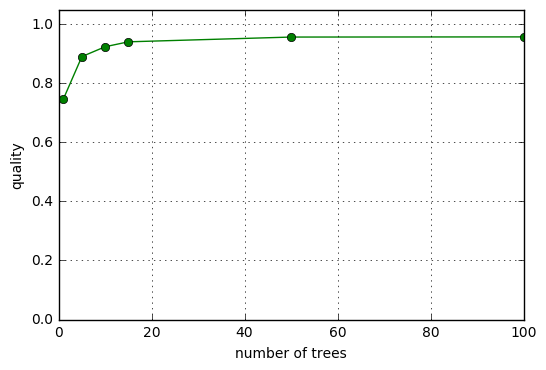

In [113]:
pylab.grid(True)
pylab.plot([1, 5, 10, 15, 50, 100], scores, 'g-', marker='o')
pylab.ylim((0.0, 1.05))
pylab.xlabel('number of trees')
pylab.ylabel('quality')

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция 
$(верно)$

5) При большом количестве признаков (для данного датасета - 40, 50) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно $(неверно)$

In [123]:
scores = []
for n in [5, 8, 15, 40, 50]:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, max_features = n, random_state = 1)
    scores.append(cross_validation.cross_val_score(rf_classifier, digits.data, digits.target, cv = 10).mean())

In [124]:
scores

[0.95665695194200973,
 0.95721300122662034,
 0.94830753741825313,
 0.94605942683567879,
 0.93829653833460858]

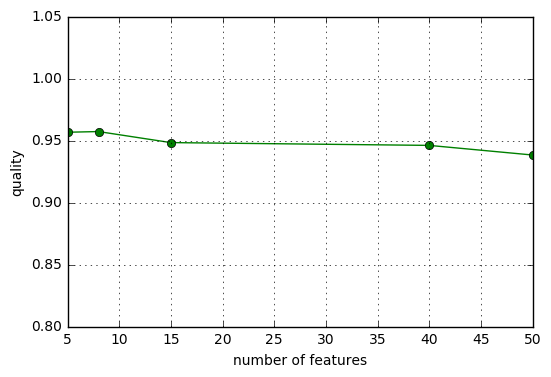

In [127]:
pylab.grid(True)
pylab.plot([5, 8, 15, 40, 50], scores, 'g-', marker='o')
pylab.ylim((0.8, 1.05))
pylab.xlabel('number of features')
pylab.ylabel('quality')

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т. к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается $(неверно)$

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т. к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т. к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья переобучены по-разному, и при усреднении они компенсируют переобученность друг друга) $(верно)$

In [128]:
scores = []
for n in [1, 5, 10, 20, 40, 50]:
    rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = n, random_state = 1)
    scores.append(cross_validation.cross_val_score(rf_classifier, digits.data, digits.target, cv = 10).mean())

In [129]:
scores

[0.67442354595986509,
 0.91316375664998883,
 0.94995389758182414,
 0.95721300122662034,
 0.95721300122662034,
 0.95721300122662034]

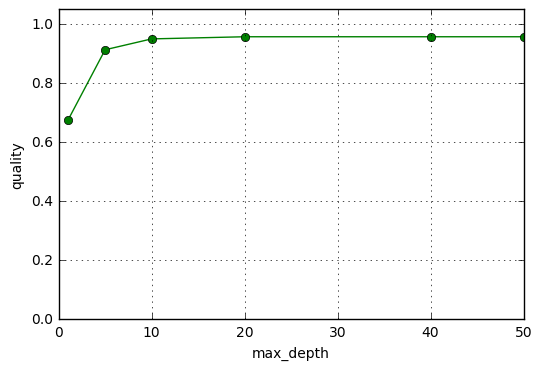

In [131]:
pylab.grid(True)
pylab.plot([1, 5, 10, 20, 40, 50], scores, 'g-', marker='o')
pylab.ylim((0.0, 1.05))
pylab.xlabel('max_depth')
pylab.ylabel('quality')